# International Conference on Applied Electronics and Computers 2023 - (ICappLEC)

## Enhancing PID Controller Performance in RLC Circuits through Metaheuristic Optimization

What abut is this?

## Code Used

### Loading Libraries

In [16]:
% add graphic tool
graphics_toolkit("gnuplot");
addpath('C:\Users\Francisco\Desktop\matlab2tikz-master\src')


pkg load control;
pkg load image;

### Code Parameters

 *** (To disable info messages, pass ['showInfo', false] to matlab2tikz.)
 *** (For all other options, type 'help matlab2tikz'.)
 *** 
 *** 
 *** This is matlab2tikz v1.1.0.
 *** 
 *** The latest developments can be retrieved from https://github.com/matlab2tikz/matlab2tikz/tree/develop.
 *** You can find more documentation on 
 ***  https://github.com/matlab2tikz/matlab2tikz
 ***   and 
 ***  https://github.com/matlab2tikz/matlab2tikz/wiki.
 *** If you encounter bugs or want a new feature, go to 
 ***  https://github.com/matlab2tikz/matlab2tikz/issues.
 *** Please visit http://www.mathworks.com/matlabcentral/fileexchange/22022-matlab2tikz-matlab2tikz
 ***   to rate matlab2tikz or download the stable release.
 *** 
 *** You will need pgfplots version 1.3 or newer to compile the TikZ output.
mse = 0.3166


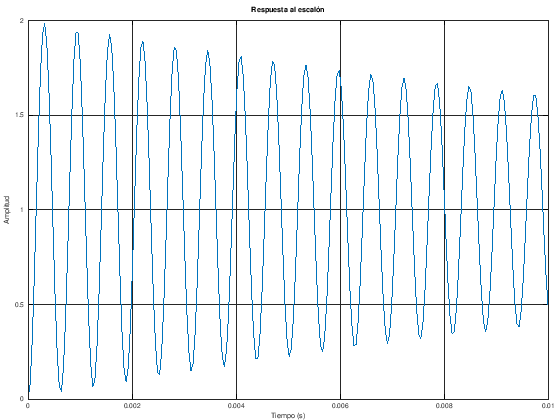

In [17]:
% RLC parameters
R = 10;
L = 100e-3;
C = 100e-9;

% creating transfer function
sys = tf([1], [L*C R*C 1]);
% sys

% simulation parameters
sampling_rate = 250; % samples
time_limit = 10e-3; % seconds
time = linspace(0, time_limit, sampling_rate);

% plotting step response
% step(sys, time);
[y, t] = step(sys, time);
plot(t, y, 'linewidth', 3);
xlabel('Tiempo (s)');
ylabel('Amplitud');
title('Respuesta al escalón');
grid on;
matlab2tikz('step.tex');


% calculate the mse
y = step(sys, time);
mse = mean((y - 1).^2);
mse

### Genetic Algorithm Parameters

In [18]:
% ga parameters
pop_size = 10;
num_generations = 250;
mutation_rate = 0.5;

% run ga
ga_result = make_ga(sys, time, pop_size, num_generations, mutation_rate, 1);

Generation 250/250

### Best PID Parameters

In [19]:
fprintf('P -> %f\nI -> %f\nD -> %f\n', ga_result.BestGains(1), ga_result.BestGains(2), ga_result.BestGains(3));

P -> 622.027582
I -> 352.742380
D -> 691.141758


### Plot Fitness Evolution

Best fitness -> 0.004000
 *** (To disable info messages, pass ['showInfo', false] to matlab2tikz.)
 *** (For all other options, type 'help matlab2tikz'.)
 *** 
 *** 
 *** This is matlab2tikz v1.1.0.
 *** 
 *** The latest developments can be retrieved from https://github.com/matlab2tikz/matlab2tikz/tree/develop.
 *** You can find more documentation on 
 ***  https://github.com/matlab2tikz/matlab2tikz
 ***   and 
 ***  https://github.com/matlab2tikz/matlab2tikz/wiki.
 *** If you encounter bugs or want a new feature, go to 
 ***  https://github.com/matlab2tikz/matlab2tikz/issues.
 *** Please visit http://www.mathworks.com/matlabcentral/fileexchange/22022-matlab2tikz-matlab2tikz
 ***   to rate matlab2tikz or download the stable release.
 *** 
 *** You will need pgfplots version 1.3 or newer to compile the TikZ output.


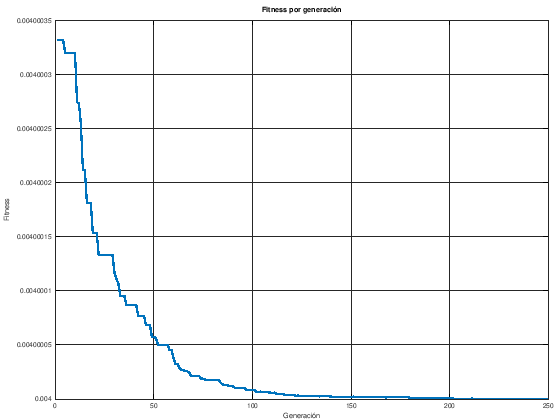

In [20]:
% print the best fitness
fprintf('Best fitness -> %f\n', ga_result.BestFitness);
% plot the fitnesses
plot(ga_result.AllFitnesses, 'linewidth', 5);
% change xlim
xlim([0, num_generations]);
xlabel('Generación');
ylabel('Fitness');
title('Fitness por generación');
grid on;
matlab2tikz('fitness.tex');

### Graph Comparition

MSE -> 0.001000
 *** (To disable info messages, pass ['showInfo', false] to matlab2tikz.)
 *** (For all other options, type 'help matlab2tikz'.)
 *** 
 *** 
 *** This is matlab2tikz v1.1.0.
 *** 
 *** The latest developments can be retrieved from https://github.com/matlab2tikz/matlab2tikz/tree/develop.
 *** You can find more documentation on 
 ***  https://github.com/matlab2tikz/matlab2tikz
 ***   and 
 ***  https://github.com/matlab2tikz/matlab2tikz/wiki.
 *** If you encounter bugs or want a new feature, go to 
 ***  https://github.com/matlab2tikz/matlab2tikz/issues.
 *** Please visit http://www.mathworks.com/matlabcentral/fileexchange/22022-matlab2tikz-matlab2tikz
 ***   to rate matlab2tikz or download the stable release.
 *** 
 *** You will need pgfplots version 1.3 or newer to compile the TikZ output.


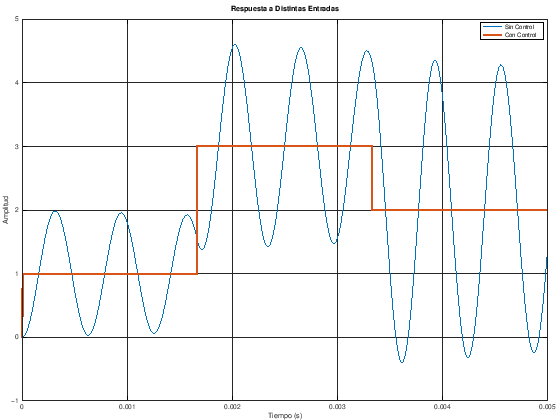

In [21]:
% get the tf with PID
sysPID = ga_result.ControlledTF;

% create my sim time
sim_time = linspace(0, 5e-3, 1000);

% apply 3 inputs throught the time using lsim
v = [1 3 2];
size_time = round(length(sim_time) / size(v, 2));
u1 = v(1) * ones(1, size_time);
u2 = v(2) * ones(1, size_time);
u3 = v(3) * ones(1, size_time + 1);
u = [u1 u2 u3];

% get the output
[y0, t0] = lsim(sys, u, sim_time);
[y, t] = lsim(sysPID, u, sim_time);

% get the mse
mse = immse(y', u(1:length(y)));
fprintf('MSE -> %f\n', mse);

% plot the results
plot(t0, y0, t, y, 'linewidth', 5);
xlabel('Tiempo (s)');
ylabel('Amplitud');
title('Respuesta a Distintas Entradas');
legend('Sin Control', 'Con Control');
grid on;
matlab2tikz('inputs.tex');


### Export the data

In [22]:
% export all fitnesses to a txt file
fileID = fopen('fitnesses.csv', 'w');
generations = 1:1:num_generations;
for i = 1:length(generations)
    fprintf(fileID, '%.11f,%.11f\n', generations(i), ga_result.AllFitnesses(i));
end
fclose(fileID);

% save the not controlled tf
[y, t] = step(sys, time);
fileID = fopen('not_controlled.csv', 'w');
for i = 1:length(t)
    fprintf(fileID, '%.11f,%.11f\n', t(i), y(i));
end
fclose(fileID);

% save the controlled tf
[y, t] = step(sysPID, time);
fileID = fopen('controlled.csv', 'w');
for i = 1:length(t)
    fprintf(fileID, '%.11f,%.11f\n', t(i), y(i));
end
fclose(fileID);

% save different inputs with the controlled tf
[y, t] = lsim(sysPID, u, sim_time);
fileID = fopen('controlled_inputs.csv', 'w');
for i = 1:10:length(t)
    fprintf(fileID, '%d,%.11f\n', t(i)*1000000, y(i));
end
fclose(fileID);

% save the different inputs with the not controlled tf
[y, t] = lsim(sys, u, sim_time);
fileID = fopen('not_controlled_inputs.csv', 'w');
for i = 1:10:length(t)
    fprintf(fileID, '%d,%.11f\n', t(i)*1000000, y(i));
end
fclose(fileID);
